### Business Problem :
* In every business it was proven about 80–20 rule., this rule tells us 80% of our revenue will be generated by only 20% of our potential customers. So our goal is to predict the revenue that is going to be generated by those potential customers in the near feature. So that marketing teams will invest appropriate money on promotional strategies to attract potential customers.



* In simple words we are given with the users past data and transactions (when they logged into G-store)., so by using this data we need to predict the future revenue will be created by those customers.




* So google provided Merchandise customer dataset and no.of transactions per customer. We will build a predictive model using G-store data set to predict the total revenue per customer that helps in better use of marketing budget and we will also interpret the most impacting element on the total revenue prediction using different models.

### About Data

* We are using datset from the Kaggle here.
https://www.kaggle.com/c/ga-customer-revenue-prediction/data


### Dataset Exploration

* fullVisitorId : A unique identifier for each user of the Google Merchandise Store.

* channelGrouping - The channel via which the user came to the Store.

* date - The date on which the user visited the Store.

* device - The specifications for the device used to access the Store.

* geoNetwork - This section contains information about the geography of the user.

* socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".

* totals - This section contains aggregate values across the session.

* trafficSource - This section contains information about the Traffic Source from which the session originated.

* visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to   the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.

* visitNumber - The session number for this user. If this is the first session, then this is set to 1.

* visitStartTime - The timestamp (expressed as POSIX time).

* hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.

* customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is   a repeated field and has an entry for each dimension that is set.

* totals - This set of columns mostly includes high-level aggregate data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\prasa\Desktop\myProjects\ga-customer-revenue-prediction\train.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [30]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

In [49]:
def load_df(csv_path="C:/Users/prasa/Desktop/myProjects/ga-customer-revenue-prediction/train.csv", nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

# print(os.listdir("C:/Users/prasa/Desktop/myProjects/ga-customer-revenue-prediction/train.csv"))

In [35]:
def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

    df = pd.read_csv(csv_path, dtype={'fullVisitorId': 'str'}, nrows=nrows)

    for column in JSON_COLUMNS:
        df = df.join(pd.DataFrame(df.pop(column).apply(pd.io.json.loads).values.tolist(), index=df.index))

    return df

In [39]:
df= load_df("C:/Users/prasa/Desktop/myProjects/ga-customer-revenue-prediction/train.csv", None)

In [50]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,(not set),google,organic,google + online,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN


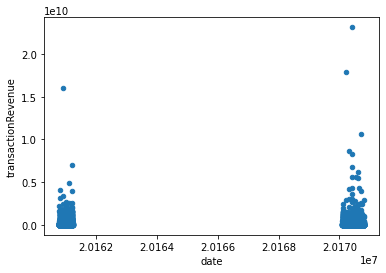

In [52]:
df.plot(kind='scatter',x='date',y='transactionRevenue')

In [24]:
data.shape

(903653, 12)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB
